In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt




np.random.seed(2)


In [2]:
dataset = pd.read_csv(r'C:\Users\Naman Bhoj\Desktop\Feb-April\in process 2021\cicn 3 naman\clickbait_data.csv')

In [3]:
dataset

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


In [4]:
len(dataset)

32000

In [5]:
dataset['clickbait'].value_counts()

0    16001
1    15999
Name: clickbait, dtype: int64

In [6]:
x_data = dataset[['headline']]
y_data = dataset[['clickbait']]

# lower text

In [7]:
x_data['headline'] = x_data["headline"].str.lower()
x_data.head()

<ipython-input-7-3aa240a4b280>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data['headline'] = x_data["headline"].str.lower()


,headline
0,should i get bings
1,which tv female friend group do you belong in
2,"the new ""star wars: the force awakens"" trailer..."
3,"this vine of new york on ""celebrity big brothe..."
4,a couple did a stunning photo shoot with their...


# remove punctuations

In [8]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

x_data["headline"] = x_data["headline"].apply(lambda text: remove_punctuation(text))
x_data.head()

<ipython-input-8-cf689520f5c6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data["headline"] = x_data["headline"].apply(lambda text: remove_punctuation(text))


,headline
0,should i get bings
1,which tv female friend group do you belong in
2,the new star wars the force awakens trailer is...
3,this vine of new york on celebrity big brother...
4,a couple did a stunning photo shoot with their...


In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

x_data["headline"] = x_data["headline"].apply(lambda text: remove_stopwords(text))

[nltk_data] Downloading package stopwords to C:\Users\Naman
[nltk_data]     Bhoj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-9-589752f7170b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data["headline"] = x_data["headline"].apply(lambda text: remove_stopwords(text))


In [10]:
x_data

,headline
0,get bings
1,tv female friend group belong
2,new star wars force awakens trailer give chills
3,vine new york celebrity big brother fucking pe...
4,couple stunning photo shoot baby learning inop...
...,...
31995,make female hearts flutter iraq throw shoe
31996,british liberal democrat patsy calton 56 dies ...
31997,drone smartphone app help heart attack victims...
31998,netanyahu urges pope benedict israel denounce ...


In [11]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

x_data["headline"] = x_data["headline"].apply(lambda text: lemmatize_words(text))

[nltk_data] Downloading package wordnet to C:\Users\Naman
[nltk_data]     Bhoj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-11-c47f3d7ecc5a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data["headline"] = x_data["headline"].apply(lambda text: lemmatize_words(text))


In [12]:
from wordcloud import WordCloud

In [13]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

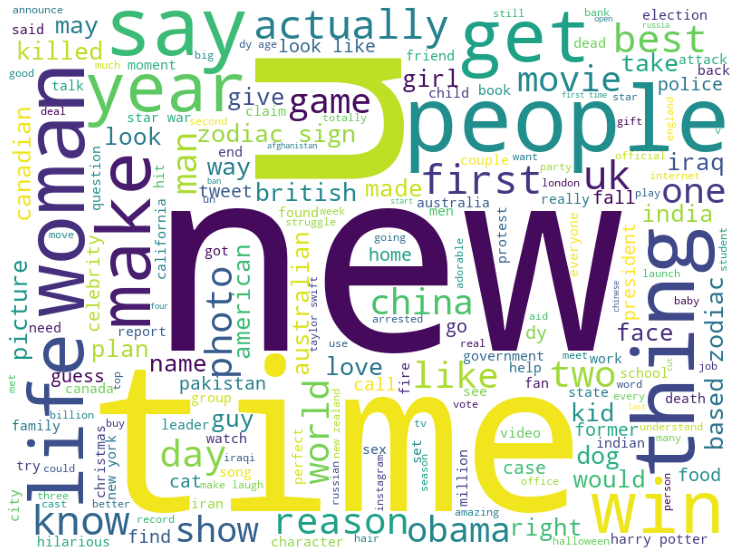

In [14]:
cloud(' '.join(x_data['headline']))

# calculate length of each tweet to use it as a feature and add it as a feature to each row

In [15]:
lengths = []

for i in range(0,len(x_data)):
    text = x_data['headline'].iloc[i]
    leng = len(text)
    lengths.append(leng)

In [16]:
x_data['length'] = lengths

In [17]:
x_data

,headline,length
0,get bings,9
1,tv female friend group belong,29
2,new star war force awakens trailer give chill,45
3,vine new york celebrity big brother fucking pe...,51
4,couple stunning photo shoot baby learning inop...,64
...,...,...
31995,make female heart flutter iraq throw shoe,41
31996,british liberal democrat patsy calton 56 dy ca...,50
31997,drone smartphone app help heart attack victim ...,67
31998,netanyahu urge pope benedict israel denounce iran,49


# extracting features from text

In [18]:
x_data_text = x_data[['headline']]

# tokenise

In [19]:
tokenise = []
for i in x_data_text['headline']:
    tokenise.append(i.split())
print(tokenise[:4])

[['get', 'bings'], ['tv', 'female', 'friend', 'group', 'belong'], ['new', 'star', 'war', 'force', 'awakens', 'trailer', 'give', 'chill'], ['vine', 'new', 'york', 'celebrity', 'big', 'brother', 'fucking', 'perfect']]


In [20]:
!pip install gensim

In [21]:

from gensim.models import Word2Vec


C:\Users\Naman Bhoj\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [22]:
w2vec = Word2Vec(tokenise, vector_size=75, workers=64, min_count=1, window=3)
print(w2vec)

Word2Vec(vocab=21683, vector_size=75, alpha=0.025)


In [23]:

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [24]:
token = Tokenizer(21683)
token.fit_on_texts(x_data_text['headline'])
text = token.texts_to_sequences(x_data_text['headline'])
text = pad_sequences(text)

In [25]:
text

array([[    0,     0,     0, ...,     0,    26, 11499],
       [    0,     0,     0, ...,    91,   170,   662],
       [    0,     0,     0, ...,   722,   105,   854],
       ...,
       [    0,     0,     0, ...,  4883,  1197,  1206],
       [    0,     0,     0, ...,  2360,   397,   221],
       [    0,     0,     0, ...,  2609,   222,   357]])

# storing vectorized in to data frame

In [26]:
 final_data = pd.DataFrame(data=text[1:,1:],    # values
           index=text[1:,0],    # 1st column as index
            columns=text[0,1:])  # 1st row as the column names

In [27]:
final_data

,0,0,0,0,0,0,0,0,0,0,0,0,0,26,11499
0,0,0,0,0,0,0,0,0,0,0,109,899,91,170,662
0,0,0,0,0,0,0,0,2,55,73,180,994,722,105,854
0,0,0,0,0,0,0,0,1126,2,172,104,197,794,498,160
0,0,0,0,0,0,0,182,1071,39,963,215,3749,11500,1292,5778
0,0,0,0,0,0,0,0,0,6818,2061,47,332,438,1721,4507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,6,899,507,8738,98,1827,1485
0,0,0,0,0,0,0,0,58,1952,1211,21681,21682,3973,42,742
0,0,0,0,0,0,1682,3283,2232,156,507,118,719,4883,1197,1206
0,0,0,0,0,0,0,0,0,0,3175,1457,627,2360,397,221


In [28]:
length_data = x_data[['length']]

In [29]:
final_data.reset_index(drop=True, inplace=True)
length_data.reset_index(drop=True,inplace = True)


In [30]:
x_final_data = pd.concat([final_data, length_data], axis=1)

In [31]:
x_final_data = x_final_data[:31999]

In [32]:
x_final_data

,0,0,0,0,0,0,0,0,0,0,0,0,0,26,11499,length
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.0,899.0,91.0,170.0,662.0,9
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,55.0,73.0,180.0,994.0,722.0,105.0,854.0,29
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1126.0,2.0,172.0,104.0,197.0,794.0,498.0,160.0,45
3,0.0,0.0,0.0,0.0,0.0,0.0,182.0,1071.0,39.0,963.0,215.0,3749.0,11500.0,1292.0,5778.0,51
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6818.0,2061.0,47.0,332.0,438.0,1721.0,4507.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,899.0,507.0,8738.0,98.0,1827.0,1485.0,74
31995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,1952.0,1211.0,21681.0,21682.0,3973.0,42.0,742.0,41
31996,0.0,0.0,0.0,0.0,0.0,1682.0,3283.0,2232.0,156.0,507.0,118.0,719.0,4883.0,1197.0,1206.0,50
31997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3175.0,1457.0,627.0,2360.0,397.0,221.0,67


In [33]:
y_data = y_data[:31999]

In [34]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_final_data,y_data, test_size = 0.2 , random_state=2)


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, MaxPool1D, Dropout, Dense, GlobalMaxPooling1D, Embedding, Activation

In [36]:
model = Sequential()
model.add(Embedding(21683, 75, input_length=3))
model.add(LSTM(32, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 3, 75)             1626225   
_________________________________________________________________
lstm (LSTM)                  (None, 3, 32)             13824     
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,640,082
Trainable params: 1,640,082
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=512,  epochs=100)

Epoch 1/100
50/50 [==============================] - 4s 41ms/step - loss: 0.6738 - accuracy: 0.7195
Epoch 2/100
50/50 [==============================] - 2s 42ms/step - loss: 0.2433 - accuracy: 0.9532
Epoch 3/100
50/50 [==============================] - 2s 42ms/step - loss: 0.0841 - accuracy: 0.9788
Epoch 4/100
50/50 [==============================] - 2s 44ms/step - loss: 0.0509 - accuracy: 0.9887
Epoch 5/100
50/50 [==============================] - 2s 42ms/step - loss: 0.0351 - accuracy: 0.9933
Epoch 6/100
50/50 [==============================] - 2s 43ms/step - loss: 0.0256 - accuracy: 0.9953
Epoch 7/100
50/50 [==============================] - 2s 42ms/step - loss: 0.0176 - accuracy: 0.9976
Epoch 8/100
50/50 [==============================] - 2s 42ms/step - loss: 0.0133 - accuracy: 0.9983
Epoch 9/100
50/50 [==============================] - 2s 43ms/step - loss: 0.0105 - accuracy: 0.9987
Epoch 10/100
50/50 [==============================] - 2s 43ms/step - loss: 0.0085 - accuracy: 0.9991

50/50 [==============================] - 2s 49ms/step - loss: 1.2426e-04 - accuracy: 1.0000
Epoch 74/100
50/50 [==============================] - 2s 42ms/step - loss: 1.2562e-04 - accuracy: 1.0000
Epoch 75/100
50/50 [==============================] - 2s 45ms/step - loss: 1.1199e-04 - accuracy: 1.0000
Epoch 76/100
50/50 [==============================] - 3s 58ms/step - loss: 1.0424e-04 - accuracy: 1.0000
Epoch 77/100
50/50 [==============================] - 3s 53ms/step - loss: 1.4973e-04 - accuracy: 1.0000
Epoch 78/100
50/50 [==============================] - 2s 49ms/step - loss: 0.0242 - accuracy: 0.9949
Epoch 79/100
50/50 [==============================] - 3s 50ms/step - loss: 0.0074 - accuracy: 0.9979
Epoch 80/100
50/50 [==============================] - 2s 43ms/step - loss: 0.0037 - accuracy: 0.9991
Epoch 81/100
50/50 [==============================] - 2s 46ms/step - loss: 0.0015 - accuracy: 0.9996
Epoch 82/100
50/50 [==============================] - 2s 48ms/step - loss: 8.5822e-0

In [45]:
preds = [round(i[0]) for i in model.predict(x_test)]

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
cm = confusion_matrix(y_test, preds)


In [48]:
print(cm)

[[2942  182]
 [ 136 3140]]


In [49]:
from sklearn.metrics import classification_report

In [50]:
cr_lstm = classification_report(y_test,preds,digits = 5)

In [51]:
print(cr_lstm)

              precision    recall  f1-score   support

           0    0.95582   0.94174   0.94873      3124
           1    0.94521   0.95849   0.95180      3276

    accuracy                        0.95031      6400
   macro avg    0.95051   0.95011   0.95026      6400
weighted avg    0.95039   0.95031   0.95030      6400

